# Análisis exploratorio de datos - Covid
Ve de lo más general a lo más específico.

Pasos a seguir:
1. Entiende unimensionalmente los datos y sus patrones (conteos, estadística, histogramas, etc.). Una por una.
2. Combina variables para ver cómo están correlacionadas (gráficas de correlación). Impacto de una en otra.
3. Cómo una variable categórica impacta a otra.

Extras:
- Si te faltan datos, búscalos y enriquéselos
- 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
# Load data
path = '/work/covid-ec/data/processed/'

positives = pd.read_csv(path + 'positives.csv')
vaccines = pd.read_csv(path + 'vaccines.csv')
deaths = pd.read_csv(path + 'deaths.csv')

Las columnas de fecha son tipo `object` de nuevo. Se hace la transformación.

In [4]:
positives['created_at'] = pd.to_datetime(positives['created_at'])
vaccines['fecha'] = pd.to_datetime(vaccines['fecha'])
deaths['date'] = pd.to_datetime(deaths['date'])

## Positives

### Visión general

In [5]:
positives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15528 entries, 0 to 15527
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   provincia             15528 non-null  object        
 1   poblacion             15528 non-null  int64         
 2   acumulados_provincia  15528 non-null  int64         
 3   nuevas                15528 non-null  int64         
 4   created_at            15528 non-null  datetime64[ns]
 5   acumulados            15528 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 728.0+ KB


In [6]:
positives.describe()

,poblacion,acumulados_provincia,nuevas,acumulados
count,1.552800e+04,15528.000000,15528.000000,15528.000000
mean,7.278640e+05,11243.087970,35.197965,277940.432123
std,9.998201e+05,24881.103265,109.157903,186070.145354
min,3.304200e+04,0.000000,0.000000,0.000000
25%,1.941185e+05,1636.000000,1.000000,106644.250000
50%,4.824865e+05,4304.000000,8.000000,257334.500000
75%,6.222500e+05,10162.250000,28.000000,477316.250000
max,4.387434e+06,199324.000000,3388.000000,546554.000000


### Análisis unidimensional

¿Cuántos casos positivos hay al día quitando los outliers?

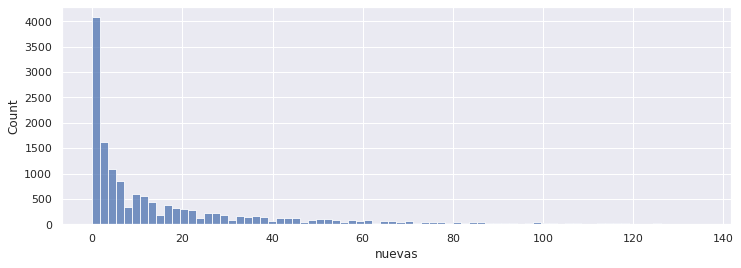

In [40]:
plt.figure(figsize=[12, 4])
data_p = positives[positives['nuevas'] < positives['nuevas'].quantile(0.95)]['nuevas']
sns.histplot(data=data_p)
plt.show()

### Análisis multidimensional

<AxesSubplot:xlabel='created_at', ylabel='nuevas'>

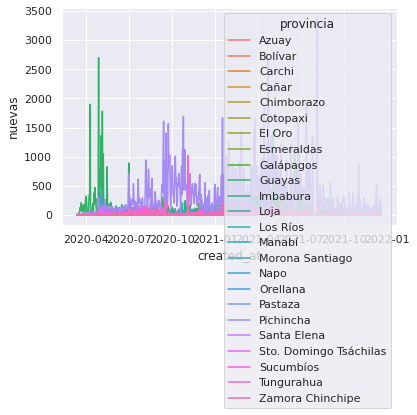

In [9]:
sns.lineplot(data=positives, x='created_at', y='nuevas', hue='provincia')

## Vaccines

### Visión general

In [10]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha          243 non-null    datetime64[ns]
 1   dosis_total    243 non-null    int64         
 2   primera_dosis  243 non-null    int64         
 3   segunda_dosis  243 non-null    int64         
 4   refuerzo       243 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 9.6 KB


In [11]:
vaccines.describe()

,dosis_total,primera_dosis,segunda_dosis,refuerzo
count,2.430000e+02,2.430000e+02,2.430000e+02,243.000000
mean,1.215558e+07,6.930718e+06,5.156957e+06,67852.111111
std,9.714354e+06,5.087982e+06,4.667072e+06,168992.123224
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.810429e+06,1.352078e+06,4.583510e+05,0.000000
50%,1.191780e+07,9.358610e+06,2.559190e+06,0.000000
75%,2.137022e+07,1.132739e+07,1.004283e+07,1.000000
max,2.658816e+07,1.360040e+07,1.220986e+07,777896.000000


### Análisis multidimensional

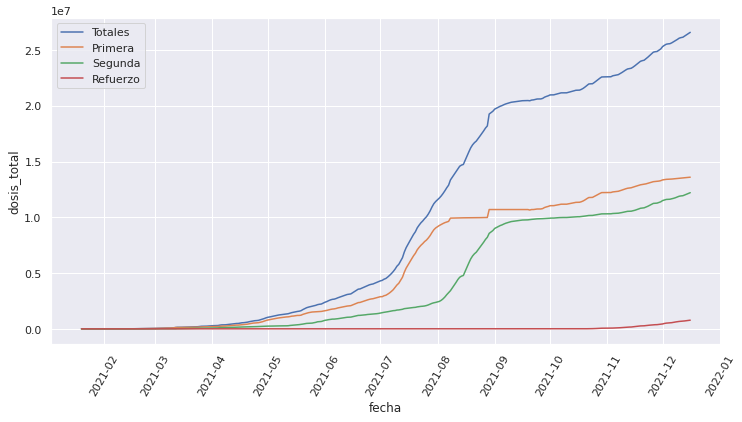

In [14]:
plt.figure(figsize=[12, 6])
sns.lineplot(data=vaccines, x='fecha', y='dosis_total',  label='Totales')
sns.lineplot(data=vaccines, x='fecha', y='primera_dosis', label='Primera')
sns.lineplot(data=vaccines, x='fecha', y='segunda_dosis', label='Segunda')
sns.lineplot(data=vaccines, x='fecha', y='refuerzo', label='Refuerzo')
plt.xticks(rotation=60)
plt.show()

## Deaths

### Visión general

In [15]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         698 non-null    datetime64[ns]
 1   accumulated  698 non-null    int64         
 2   new          697 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.5 KB


In [16]:
deaths.describe()

,accumulated,new
count,698.000000,697.000000
mean,15205.404011,48.196557
std,11209.734308,364.845834
min,0.000000,0.000000
25%,5137.000000,1.000000
50%,14086.000000,19.000000
75%,21523.000000,42.000000
max,33593.000000,8786.000000


### Análisis unidimensional

Data sin outliers

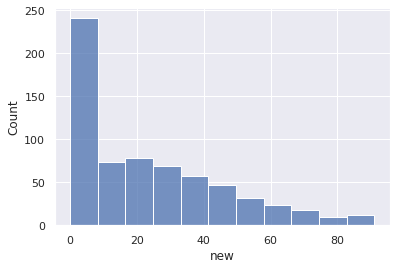

In [36]:
data_d = deaths[deaths['new'] < deaths['new'].quantile(0.95)]['new']
sns.histplot(data=data_d)
plt.show()

### Análisis multidimensional

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>